In [1]:
# from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# reference: https://plotly.com/python/pie-charts/
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

# Analysis on New York City Restaurants (food_order.csv)
# Part 1


## 1.1. Data Loading

## Task1
---
Load the dataset `food_order.csv` into a pandas `DataFrame`

In [2]:
# uploaded = files.upload()

In [3]:
# task1
df_nyc = pd.read_csv("food_order.csv")

### Task2
---
Display the first 10 rows

In [4]:
# task2
df_nyc.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


## 1.2 Data Description

### task3
---
Identify the data types for each feature

In [5]:
# task3
df_nyc.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

### task4
---
Write a function that calculates the `null_rate` for each column

In [6]:
# task4: calculate `null rate` for reach column
# reference: https://medium.com/geekculture/is-there-any-distinction-between-isnull-and-isna-method-of-pandas-dataframe-47095c16f026#:~:text=Distinction%20Between%20isna()%20and,an%20alias%20for%20isna()%20.
# check for NA, null, nan etc values
# turn on flag to detect for inf
pd.options.mode.use_inf_as_na = True
df_nyc.isna().sum(axis=0) # this is just a basic way of checking with build in tools; NOT my final answer for task4

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### task4 - my answer
---
My interpretation of the answer
- I see "Not given" also as NULL / NA for my analysis purpose 
- doing manually because I see "Not given" in ratings, however is_na could not handle that

In [7]:
# original counted was enough,  but Harsh wants in %, so added * 100, and rounding up to  4 digits
def get_null_rate(data):
    return round(sum(e == "Not given" for e in data) * 100 / len(data), 4)

In [8]:
display(df_nyc.apply(get_null_rate)) # task4 - my answer

order_id                  0.0000
customer_id               0.0000
restaurant_name           0.0000
cuisine_type              0.0000
cost_of_the_order         0.0000
day_of_the_week           0.0000
rating                   38.7777
food_preparation_time     0.0000
delivery_time             0.0000
dtype: float64

### task5

In [9]:
# task5: unique values per column
df_nyc.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

## 1.3 Data Manipulation


### task6
---
- add a column`total_time` 


In [10]:
df_nyc["total_time"] = df_nyc["food_preparation_time"] + df_nyc["delivery_time"]
df_nyc

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,54


## 1.4 Statistics

### task7
---
different cuisine types


In [11]:
# task7: different cuisine types
cuisine_types = df_nyc["cuisine_type"].unique()
display(cuisine_types)

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

### task8
---
number of restaurants per cuisine type

In [12]:
# task8: number of restaurants per cuisine type
# reference1: https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/
# reference2: https://towardsdatascience.com/all-pandas-groupby-you-should-know-for-grouping-data-and-performing-operations-2a8ec1327b5
restaurants_groupby_cuisine_types = df_nyc.groupby("cuisine_type")
restaurants_by_cuisine_type = restaurants_groupby_cuisine_types\
                                .nunique()["restaurant_name"]\
                                .reset_index()\
                                .rename(columns={"restaurant_name": "number_of_restaurants"})

display(restaurants_by_cuisine_type)

,cuisine_type,number_of_restaurants
0,American,41
1,Chinese,16
2,French,3
3,Indian,14
4,Italian,31
5,Japanese,29
6,Korean,5
7,Mediterranean,5
8,Mexican,11
9,Middle Eastern,7


## 1.5 Visualization

### task9 - A
---
Using your results from Task 8, and using a pie chart display the count of restaurants per cuisine type

  
- To be honest, pie chart is **not the ideal choice** to plot part-a<br>
- in real world, I would plot part-a with bar-chart horizontally in decresing order; and part-b is okay with pie-chart having to only show top5

In [13]:
# store data in dictionary to give asthetics to pie chart later
# for asthetic purpose I would sort according to the number of restaurants per cuisine in descending order
# reference: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
# data_dict = dict(sorted(restaurants_by_cuisine_types.items(), key=lambda e: -e[1]))
# well, there is an easier way to sort this in pandas
df_data = restaurants_by_cuisine_type.sort_values(by=["number_of_restaurants"], ascending=False)

# for asthetics of the pie chart
# reference : https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
labels = df_data["cuisine_type"]
data = df_data["number_of_restaurants"]
# colors = ("Violet", "indigo", "blue", "green", "yellow", "orange", "red")
explode = [0.02 * i for i in range(len(data))]

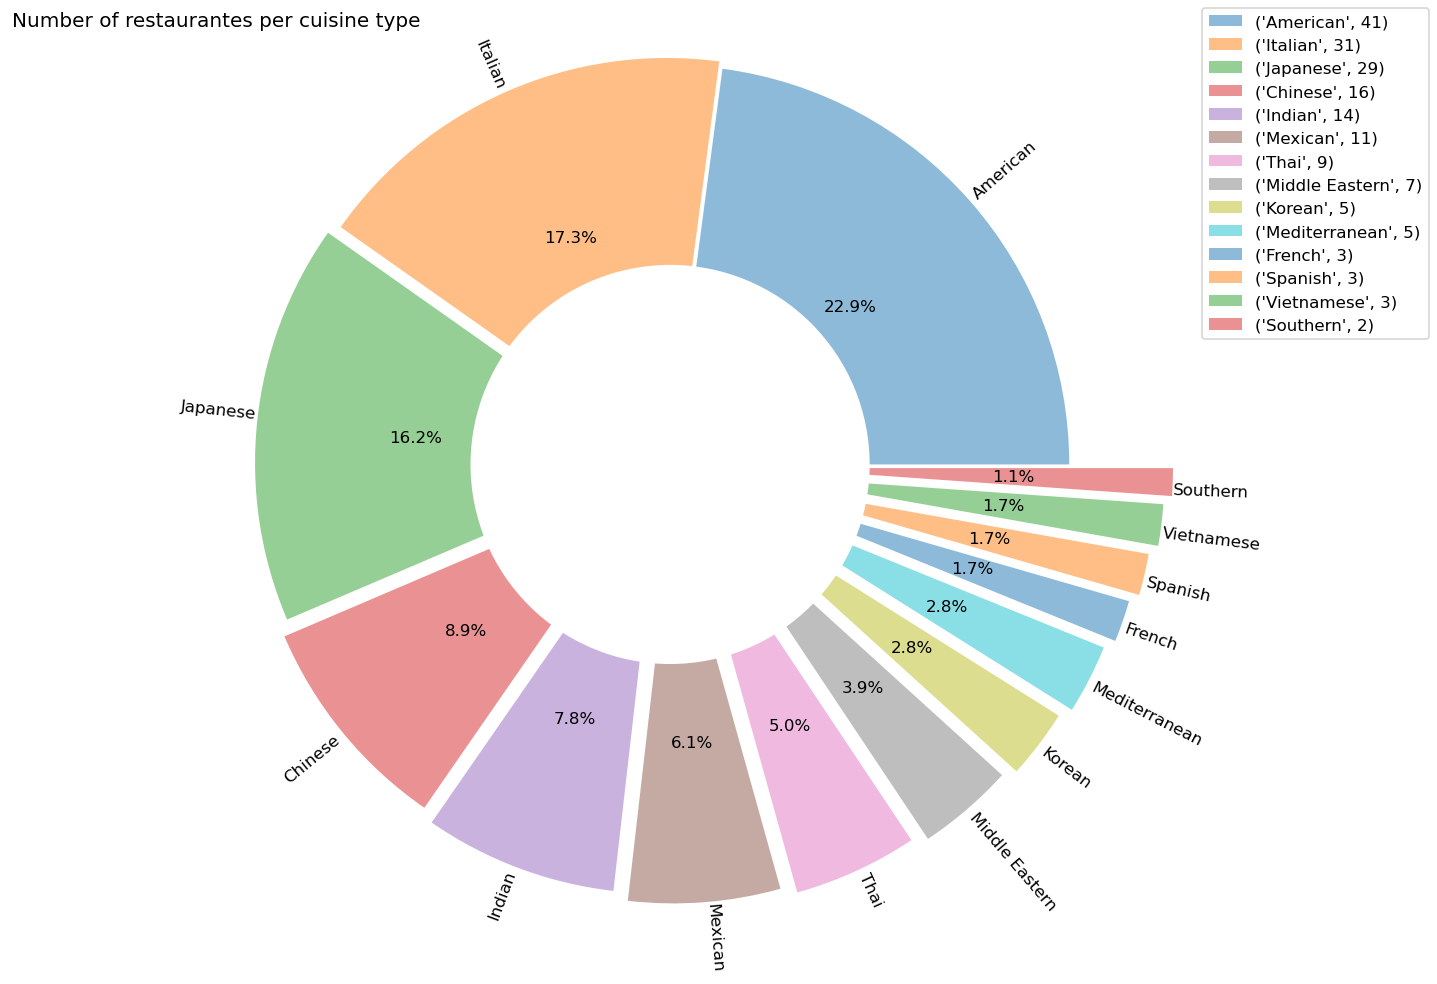

In [14]:
# plotting commands 
# set figure size: https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib
figure = plt.figure(figsize = (12, 8), dpi=120)
plot = plt.subplot()
plot.pie(
    x = data,
    labels = labels,
    autopct = "%1.1f%%",
    rotatelabels = True,
    labeldistance = 1,
    explode = explode,
    #startangle = -90,
    wedgeprops = {"alpha" : 0.5},
)

# draw circle at the center
center_circle = plt.Circle((0, 0), radius = 0.5, fc="white")
figure = plt.gcf()
figure.gca().add_artist(center_circle)

# to put legends with number of restaurants
legends_labels = dict(zip(labels, data))

# for equal aspect ratio, so that it doens't become ellipse and stay circle
plot.axis("equal")
plt.tight_layout()
figure.legend(legends_labels.items())
plt.title("Number of restaurantes per cuisine type", loc="left")
plt.show()

- another way of plotting it with plotly - that shows interactive plots
- however, I am new to plotly so I don't know all the cool stuff plotly can do

In [15]:
fig = go.Figure(data = [
    go.Pie(
        values = data,
        labels = labels,
        hole = 0.5,
        pull = explode,
    )
])

fig.update_layout(title_text="restaurants by cuisine type")
fig.show()

### task9 - B
---
Show only the 5 cuisine types with most restaurants.

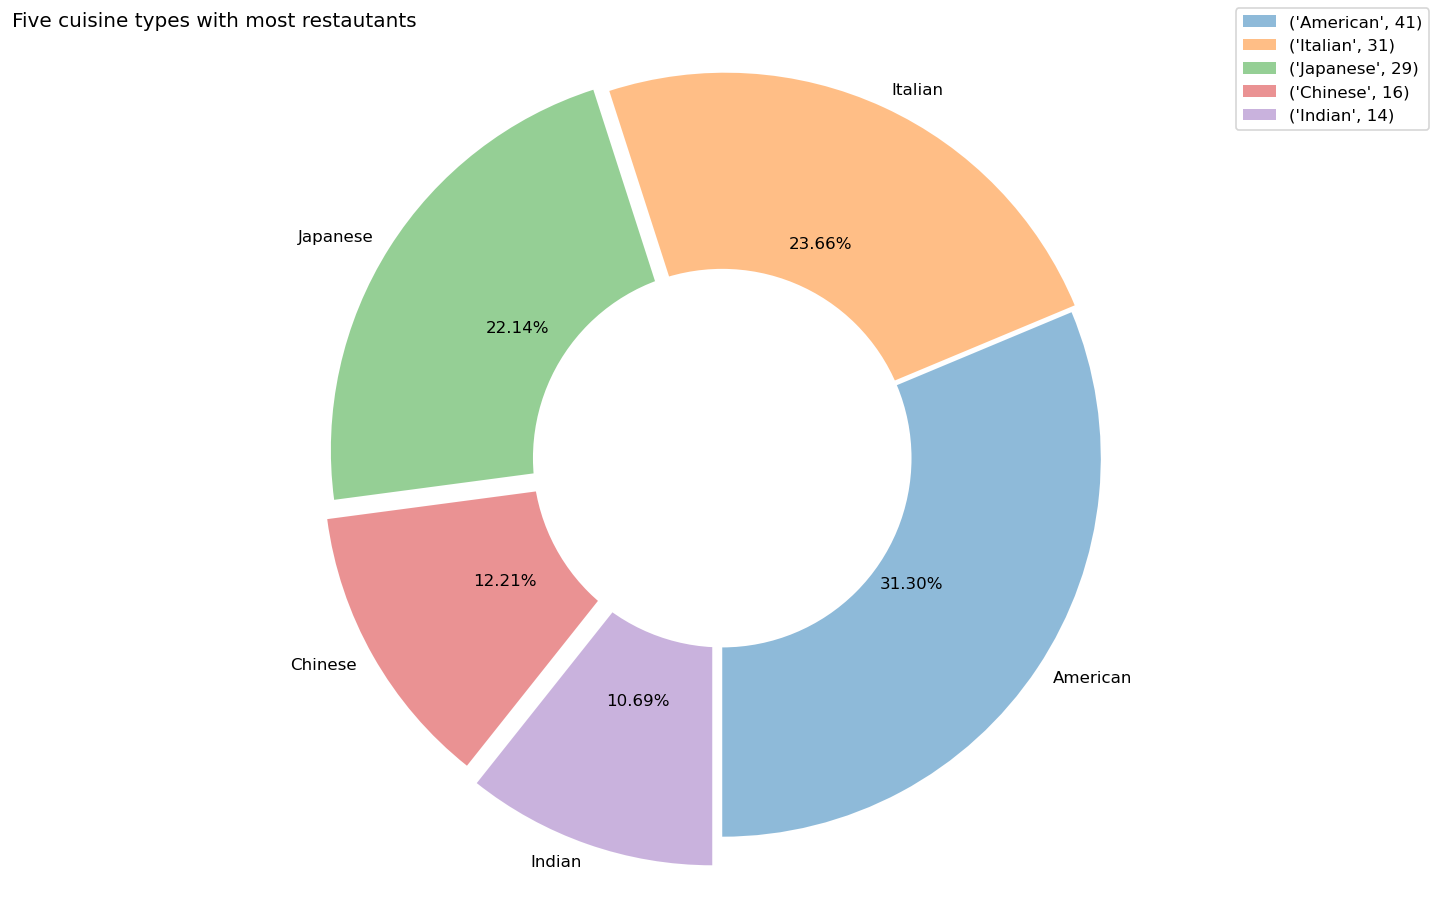

In [16]:
top_data = data[:5]
top_labels = labels[:5]
top_explode = explode[:5]

figure = plt.figure(figsize=(12, 7.5), dpi=120)
plot = plt.subplot()
plot.pie(
    x = top_data,
    labels = top_labels,
    labeldistance = 1.05,
    autopct = "%1.2f%%",
    explode = top_explode,
    startangle = -90,
    wedgeprops = {"alpha" : 0.5},
)

# draw circle at the center
center_circle = plt.Circle((0, 0), radius = 0.5, fc="white")
figure = plt.gcf()
figure.gca().add_artist(center_circle)

# legend labels
top_legend_labels = dict(zip(top_labels, top_data))

# for equal aspect ratio, so that it doens't become ellipse and stay circle
plot.axis("equal")
plt.tight_layout()
figure.legend(top_legend_labels.items())
plt.title("Five cuisine types with most restautants", loc="left")
plt.show()

### task10 A, B
---
`10` most popular restaurant name

---
highlight the top 3

---

Harsh cleared that most popular restaurant names are according to the ratings.<br>
- There are only `178` unique restaurant names according to the previous results.<br>
- The ratings have "Not given" (which I am going to discard for the analysis), also convert type from string to numeric.<br><br>

- for the analysis, dropping `Not given` makes sense, because some people may just not give ratings
- rating the restaurant `0 for Not given` does **not** make sense if they're good restaurants and it would bring the rating down
- The decision is not to use `Not given` ratings at all, and drop them for the fair analysis

In [17]:
# preprocessing for the plotting
# leave original datafram intact, make a copy and update ratings there
from copy import deepcopy
df_nyc_updated = deepcopy(df_nyc)

# ratings are in string -> convert to int (i decided not to convert "not given to 0")
# reference: https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# reference: https://datatofish.com/string-to-integer-dataframe/
# reference: https://datatofish.com/dropna/
df_nyc_updated["rating"] = pd.to_numeric(df_nyc_updated["rating"], errors="coerce")
df_nyc_ratings = df_nyc_updated.dropna()

#### preprocessing for task10

---


Idea is to find average (arithmatic mean) ratings, and how many times they have been given a rating for each of this `178` distinct restaurant names to check the popularity.<br><br>

- The restaurant with 5 ratings does **not** necessarily means they are popular if they are rated only once and got 5.0 ratings, compare to other restaurants which may have 4.7 ratings but they were rated say 10 times.
- Indeed, after preparation of the data I see that there are restaurants have been rated more than 10 times. More you're rated more trusted ratings is.
- That is why for this particular task, I am going to take weighted rating as the measure of popularity compared to the average ratings.
- In cases of ties (say restaurants weighted rating was a tie), the restaurant rated less number of times wins the tie
---
- for example: restaurant `A, B, C` all have reached `120` weighted ratings
    - restaurant `A`: number of ratings: `24` and average rating is `5`
    - restaurant `B`: number of ratings: `30` and average rating is `4`
    - restaurant `C`: number of ratings: `40` and average rating is `3`
    - restaurant `D`: number of ratings: `10` and average rating is `5`
---

in this scenario, most popular restaurant would be `restaurant A` having `120 weighted rating`, but then 2nd best won't be `restaurant D` having average `5` rating, because it has been voted significantly less time compared to others. There are so many restaurant rated `5` but only rated once in our dataset. So neither `avarage rating` nor `number of ratings` are the correct metric for most popular restaurants according to me.

---

Also, once weighted ratings are equal; the restaurant with least number of ratings to reach that weighted ratings wins, not the restaurant that has been rated most number of times. Like `restaurant C` in above example has been rated `40` times to achieve that rating comapred to `restaurant A` which needed to be rated only `24` times; means it's more popular.

In [18]:
# grouping by restaurant names
restaurants_groupby_name = df_nyc_ratings.groupby("restaurant_name")

# taking the counts and mean of ratings to check the most popular after grouping, round upto 1 decimal for the ratings
# rename columns to give appropriate names after grouping
# reference: https://stackoverflow.com/questions/45959065/pandas-groupby-agg-to-return-with-a-given-column-name
# sort in the descending order in the number of counts, and if counts are tied use mean as tie-breaker
# reset index for new dataset 
# reference: https://stackoverflow.com/questions/31569549/how-to-groupby-a-dataframe-in-pandas-and-keep-columns
popular_restaurants = \
    restaurants_groupby_name["rating"]\
    .agg(["count", "sum", "mean"]).round(1)\
    .sort_values(by=["sum", "count", "mean"], ascending=[False, True, False])\
    .rename(columns={"count": "number_of_ratings", "sum":"weighted_rating", "mean": "mean_rating"})\
    .reset_index()

display(popular_restaurants)

,restaurant_name,number_of_ratings,weighted_rating,mean_rating
0,Shake Shack,133,569.0,4.3
1,The Meatball Shop,84,379.0,4.5
2,Blue Ribbon Sushi,73,308.0,4.2
3,Blue Ribbon Fried Chicken,64,277.0,4.3
4,RedFarm Broadway,41,174.0,4.2
...,...,...,...,...
151,Pepe Giallo,1,3.0,3.0
152,Sarabeth's West,1,3.0,3.0
153,Sushi Choshi,1,3.0,3.0
154,Woorijip,1,3.0,3.0


#### 10-A, 10-B
---
    a. top 10 most popular

Bar chart with restaurant name as categorical data, and number of ratings as numerical data<br>

    b. highlight the top 3

I highlighted top3 with **blue** color, rest of them are **red**)


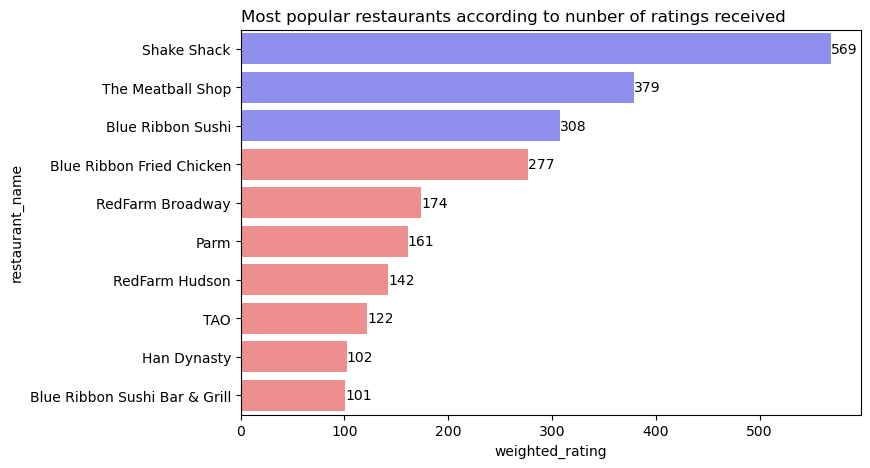

In [19]:
# top10 most popular
top = 10
most_popular = popular_restaurants[:top]

# display top_n (3) in different color
top_n = 3

# reference: https://stackoverflow.com/questions/31074758/how-to-set-a-different-color-to-the-largest-bar-in-a-seaborn-barplot
# reference: https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions
# set the color list to be passed to palette
colors = ["blue"] * top_n + ["red"] * (top - top_n)


# draw only 1 plot here
figure, plot1 = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 5))

# draw bar plot with seabourn library
sns.barplot(
    data = most_popular,
    x = most_popular["weighted_rating"],
    y = most_popular["restaurant_name"],
    palette = colors,
    alpha = 0.5,
    ax = plot1, #  in case of multiple plots, this will decide which plot is this
)

# give labels to the bars
plt.bar_label(plot1.containers[0])

# set the title for the plot
plot1.set_title("Most popular restaurants according to nunber of ratings received", loc="left")

# to show the plot
plt.show()

### task11 
- 10 most popular **for each `cuisine type`** and highlight top3
---
preprocessing for the task11<br>
group restaurants by cuisine types: use the dataframe with dropped `Not given` 

In [20]:
# data preparation step
restaurants_groupby_cuisine_types = df_nyc_ratings.groupby(["cuisine_type", "restaurant_name"])

restaurants_by_cuisine_types = \
    restaurants_groupby_cuisine_types["rating"]\
    .agg(["count", "sum", "mean"]).round(1)\
    .reset_index()\
    .sort_values(by=["sum", "count", "mean"], ascending=[False, True, False])\
    .rename(columns={"count": "number_of_ratings", "sum": "weighted_rating", "mean": "mean_rating"})

display(restaurants_by_cuisine_types)

,cuisine_type,restaurant_name,number_of_ratings,weighted_rating,mean_rating
31,American,Shake Shack,133,569.0,4.3
83,Italian,The Meatball Shop,70,317.0,4.5
91,Japanese,Blue Ribbon Sushi,73,308.0,4.2
6,American,Blue Ribbon Fried Chicken,64,277.0,4.3
46,Chinese,RedFarm Broadway,41,174.0,4.2
...,...,...,...,...,...
78,Italian,Pepe Giallo,1,3.0,3.0
106,Japanese,Sushi Choshi,1,3.0,3.0
120,Korean,Woorijip,1,3.0,3.0
138,Middle Eastern,Byblos Restaurant,1,3.0,3.0


gather top10 of each cuisine type

In [21]:
# reference: https://realpython.com/pandas-groupby/ 
popular_by_cuisine_types = restaurants_by_cuisine_types.groupby("cuisine_type").head(10)

# after fetching top10 of each cuisine type: it didn't maintain the grouping as I wanted, so grouping it again according to cuisine type
most_popular_by_cuisine_types = popular_by_cuisine_types.groupby("cuisine_type")
# display(most_popular_by_cuisine_types.get_group("Indian")) # just display one of the group to check if it's a desired result

/tmp/ipykernel_1504911/2028226583.py:27: UserWarning:

Glyph 142 (\x8e) missing from current font.

/home/bhavik/anaconda3/envs/data-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 142 (\x8e) missing from current font.



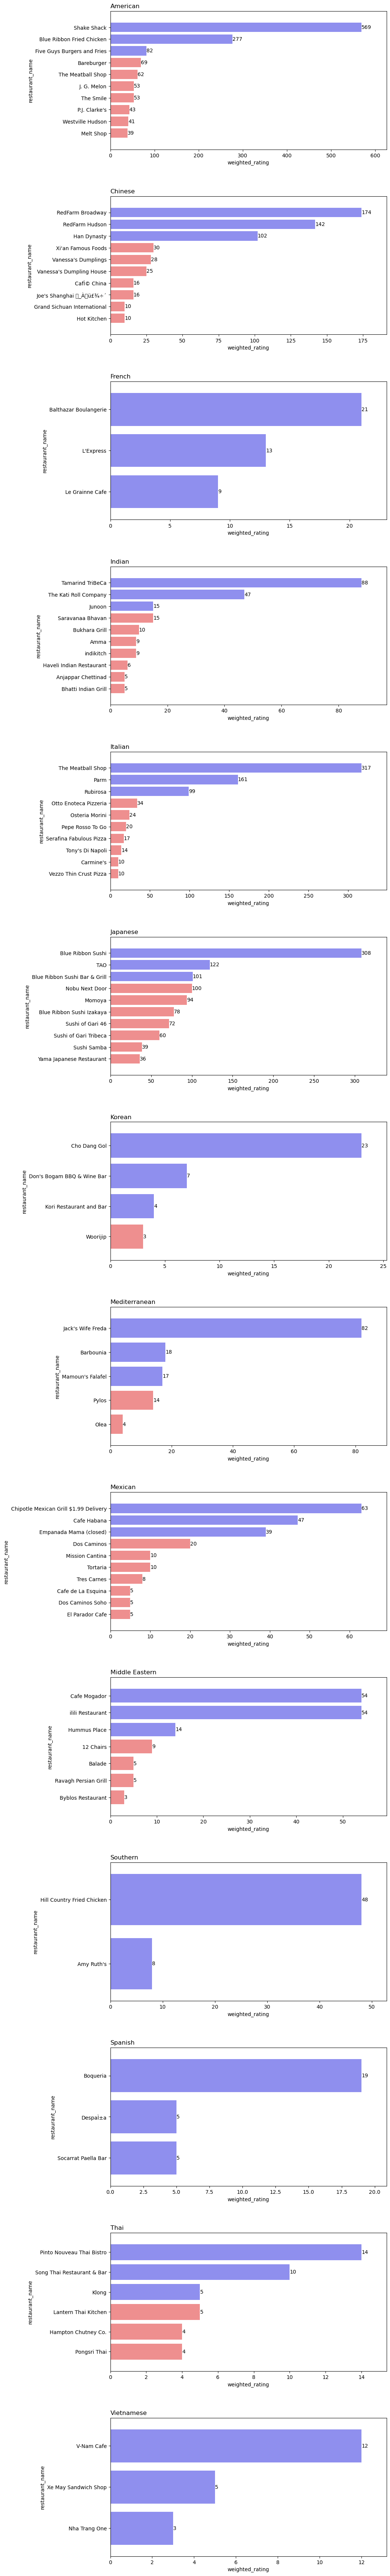

In [22]:
# asthertic - labels, title, margin, figure size, etc
# reference: https://stackoverflow.com/questions/67112449/bar-labels-in-matplotlib-seaborn

figure, plots = plt.subplots(nrows=most_popular_by_cuisine_types.ngroups, ncols=1, figsize=(10, 70))

for index, cuisine_type in enumerate(most_popular_by_cuisine_types.groups):
    restaurants_data = most_popular_by_cuisine_types.get_group(cuisine_type)

    sns.barplot(
        data = restaurants_data,
        x = restaurants_data["weighted_rating"],
        y = restaurants_data["restaurant_name"],
        ax = plots[index],
        width = 0.8,
        alpha = 0.5,
        palette = ["blue"] * min(3, len(restaurants_data)) + \
            ["red"] * max(0, len(restaurants_data) - min(3, len(restaurants_data)))
    )

    for label in plots[index].containers:
        plots[index].bar_label(label)

    plots[index].margins(x = 0.1, y = 0.1)
    plots[index].set_box_aspect(0.5)
    plots[index].set_title(cuisine_type, loc="left")

figure.tight_layout()
plt.show()


### task12
---
    a. What is the proportion of reviews for Shake Shack? 
        I take it as how many time it is rated compared to overall ratings
    b. Use a pie chart to display your results

In [23]:
# shake_shack_proportion
data = df_nyc_ratings["restaurant_name"] == "Shake Shack"
shake_shack_proportion = data.sum() / data.count() * 100
print(f"Shake Shack proportion: {shake_shack_proportion:.4f}%")

Shake Shack proportion: 11.4458%


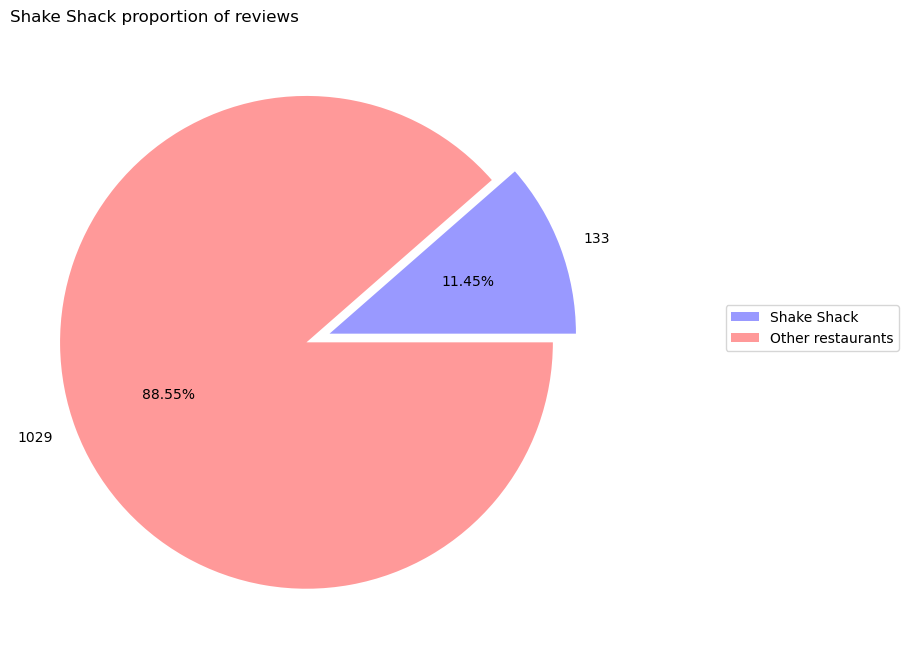

In [24]:
data = df_nyc_ratings["restaurant_name"] == "Shake Shack"
pie_data = {"Shake Shack": data.sum(), "Other restaurants": data.count() - data.sum()}

figure = plt.figure(figsize = (12, 8))

plt.pie(
    data = pie_data,
    x = pie_data.values(),
    labels = pie_data.values(),
    explode = [0.05, 0.05],
    autopct = "%1.2f%%",
    colors = ["blue", "red"],
    wedgeprops = {"alpha" : 0.4}
)

plt.title("Shake Shack proportion of reviews", loc="left")

figure.legend(pie_data, loc = "outside right")
plt.show()

### task13
link between `ratings` and `food_preparation_time`?
---
- Usually we use scatter-plot to find correlation
- Scatterplot is not ideal choice because ratings are caterized into different categories
- Scatterplot is an ideal choice with both continuos variable
- However, for the analysis purpose using it

Update: 
- adding a boxplot, because I wanted to check min, max, outlines, central tendency for different ratings
- adding a violin plot, to see the distribution aroudn the boxplot, so that I can have idea which time have more number of ratings and how it is affecting the overall ratings
- since scatter plot is not doing a good job for overlapping points, I need to add jitter that randomly add small noise to move points to have better visualization

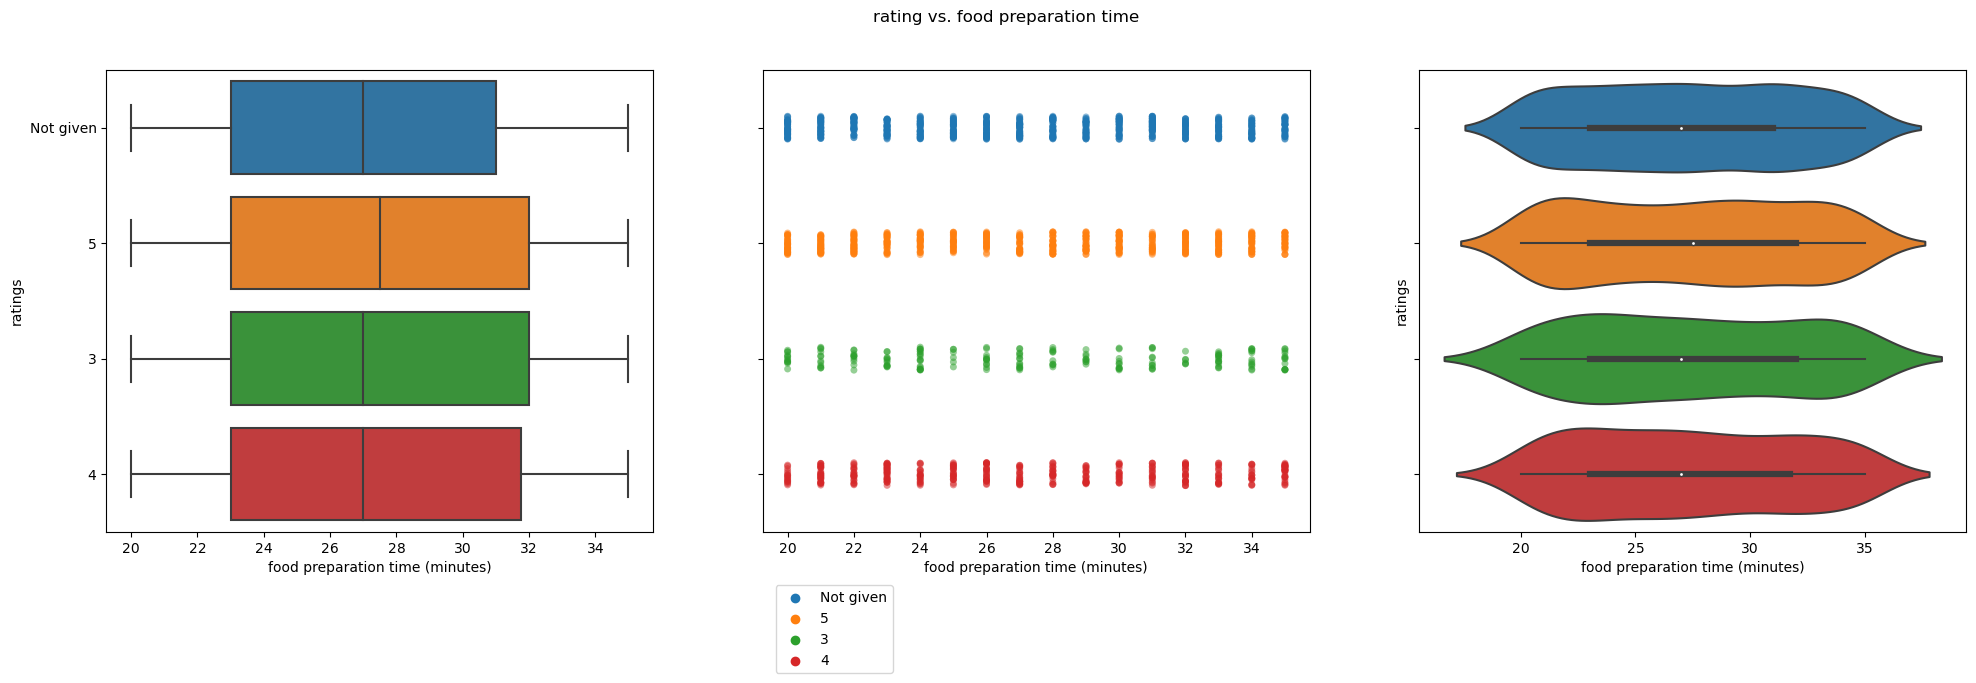

In [25]:
# including the ratings "Not given" this time for analysis
time = df_nyc["food_preparation_time"]
ratings = df_nyc["rating"]
xlabel = "food preparation time (minutes)"
ylabel = "ratings"

figure, axs = plt.subplots(ncols = 3, figsize = (24, 6), sharey=True)

sns.boxplot(
    x = time,
    y = ratings,
    ax = axs[0],
)

sns.stripplot(
    x = time,
    y = ratings,
    hue = ratings,
    ax = axs[1],
    alpha = 0.5,
)

sns.violinplot(
    x = time,
    y = ratings,
    ax = axs[2],
)

axs[1].legend(bbox_to_anchor = (0.25, -0.1))
figure.suptitle("rating vs. food preparation time")
for plot in axs: 
    plot.set(xlabel = xlabel, ylabel = ylabel)

plt.show()

- above results suggests that for any ratings (Not given, 3, 4, 5) the food-preparation time does **not** affect the ratings
- because as the food preparation time increses, I see the rating is **not decreasing** as I hoped would be the case here
- for longer preparation time say 34 minutes, all kind of ratings are given, similar for the less preparation time say 20 minutes
- this result shows that `food_processing_time` is *not* affecting `rating` and they are not linked.

---
doing further analysis to support my findings like getting correlation coefficient.

In [26]:
from scipy.stats import pearsonr
r_value, p_value = pearsonr(df_nyc_ratings["rating"], df_nyc_ratings["food_preparation_time"])
print(f"Pearson correlation (r): {r_value: .4f}")
print(f"P-value: {p_value: .4f}")


Pearson correlation (r): -0.0061
P-value:  0.8359


The person correlation coffeficient is `-0.0061`
- That indicate that the less notable correlation.
---

From above two evidences (visualization and the calculated value), I conclude that there is **no link (no correlation)** between `rating` and `food_preparation_time` for the given data-set.

However, there could be some other variable affecting the results. like delivery time or total time. But both are showing the similar results as above.

In [27]:
# with delivery time
r_value, p_value = pearsonr(df_nyc_ratings["rating"], df_nyc_ratings["delivery_time"])
print(f"Pearson correlation (r): {r_value: .4f}")
print(f"P-value: {p_value: .4f}")


Pearson correlation (r): -0.0098
P-value:  0.7385


In [28]:
# with total time
r_value, p_value = pearsonr(df_nyc_ratings["rating"], df_nyc_ratings["total_time"])
print(f"Pearson correlation (r): {r_value: .4f}")
print(f"P-value: {p_value: .4f}")

Pearson correlation (r): -0.0113
P-value:  0.6992


# End of Part 1

# Sentiment Analysis on Tweets (tweet.csv)
# Part2

In [29]:
# uploaded = files.upload()

## 2.1 Data loading



### task1
---
load `tweet.csv`


In [30]:
tweet_df = pd.read_csv("tweets.csv")
# to check if it is loaded correctly
display(tweet_df)

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32
...,...,...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27


### task2
---
last `10` rows

In [31]:
tweet_df.tail(10)

,Tweets,Retweets,Likes,Date
3050,@cybrtrkguy Vote them out,7712,68748,2022-01-27 23:41:28
3051,"If you scare people enough, they will demand r...",119804,543466,2022-01-27 23:39:57
3052,Seems odd that the UN still hasn’t released 20...,32799,262118,2022-01-27 22:24:24
3053,@jayvasdigital Freedom is being stripped away ...,12348,63170,2022-01-27 22:05:43
3054,@LimitingThe @baglino Manganese also requires ...,128,2543,2022-01-27 22:03:29
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27
3059,CB radios are free from govt/media control,11302,113429,2022-01-27 21:00:09


## 2.2 Data Cleaning

In [32]:
# check for null values
tweet_df.isnull().mean()

Tweets      0.0
Retweets    0.0
Likes       0.0
Date        0.0
dtype: float64

### task3
---
remove hyperlinks

In [34]:
import re
def remove_hyperlinks(text):
    return re.sub("https?:\/\/[a-z0-9-]+(?:\.[a-z0-9-]+)+[/?\S?#]*", "", text)

# test
# 3rd tweet has URL that is removed
tweet_list = tweet_df["Tweets"]
print("Before removing URLs")
print(tweet_list.iloc[2]) # to show that this particular tweet had url which was removed

print("\nAfter removing URLs")
# reference: https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe
tweet_list = list(map(remove_hyperlinks, tweet_list))
print(tweet_list[2])

Before removing URLs
Dear Twitter Advertisers https://t.co/GMwHmInPAS

After removing URLs
Dear Twitter Advertisers 


### task4
---
remove stop words


In [35]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords") # for stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /home/bhavik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
def remove_stopwords(text):
    return " ".join(word for word in text.split() if word not in stop_words)

# test
print("After removing stop words")
tweet_list = list(map(remove_stopwords, tweet_list))
print(tweet_list)

After removing stop words
['@PeterSchiff 🤣 thanks', '@ZubyMusic Absolutely', 'Dear Twitter Advertisers', '@BillyM2k 👻', 'Meeting lot cool people Twitter today!', 'Entering Twitter HQ – let sink in!', '@dogeofficialceo @mtaibbi 🤣💪', '@mtaibbi 🤣', '@ARodTV Definitely closer citizen journalism – local news orgs under-appreciated &amp; get way prominence Twitter', '@sandyleevincent Nobody bats 1000 🤷\u200d♂️', 'A beautiful thing Twitter empowers citizen journalism – people able disseminate news without establishment bias', '@teslaownersSV I’m big fan citizen journalism!', '“According unnamed sources close matter wish remain anonymous” 🤣🤣', '“The New York Times emerged new, chaotic actor global politics. The paper’s interventions world’s combustible conflicts sometimes boon, messaging also caused problems.”', '@dontreadonmeow @nytimes 🤣🔥', '@PPathole @Twitter Yes!', '@westcoastbill 30% lot', '@eldsjal Concerning', 'Works moving land object', '@chazman @lexfridman Fasting rocks', '@VitalikBu

### task5
---
remove mentions (@ and  the word after it)

In [37]:
def remove_mentions(text):
    return re.sub("@\S+", "", text)

# test
tweet_list = list(map(remove_mentions, tweet_list))
print(tweet_list)

[' 🤣 thanks', ' Absolutely', 'Dear Twitter Advertisers', ' 👻', 'Meeting lot cool people Twitter today!', 'Entering Twitter HQ – let sink in!', '  🤣💪', ' 🤣', ' Definitely closer citizen journalism – local news orgs under-appreciated &amp; get way prominence Twitter', ' Nobody bats 1000 🤷\u200d♂️', 'A beautiful thing Twitter empowers citizen journalism – people able disseminate news without establishment bias', ' I’m big fan citizen journalism!', '“According unnamed sources close matter wish remain anonymous” 🤣🤣', '“The New York Times emerged new, chaotic actor global politics. The paper’s interventions world’s combustible conflicts sometimes boon, messaging also caused problems.”', '  🤣🔥', '  Yes!', ' 30% lot', ' Concerning', 'Works moving land object', '  Fasting rocks', '   Had double-take. This first non-fake Vitalik tweet I’ve seen while.', '    💯', '  One man’s hedge another man’s shrub', ' Yup', ' True', ' Too much respect authority inhibits innovation', '   💪', '     😉', 'What le

### task6
---
remove # but not the word after it

In [38]:
def remove_hashtag(text):
    return re.sub("#", "", text)

# test
print(f"Before removing hashtag: {tweet_list[2848]}")


tweet_list = list(map(remove_hashtag, tweet_list))
print(f"After removing hashtag {tweet_list[2848]}")

Before removing hashtag:  #teamhumanity
After removing hashtag  teamhumanity


### task7
---
remove punctuations

In [39]:
import string
def remove_punctuations(text):
    return text.translate(str.maketrans("", "", string.punctuation))

# test
tweet_list = list(map(remove_punctuations, tweet_list))
print(tweet_list)

[' 🤣 thanks', ' Absolutely', 'Dear Twitter Advertisers', ' 👻', 'Meeting lot cool people Twitter today', 'Entering Twitter HQ – let sink in', '  🤣💪', ' 🤣', ' Definitely closer citizen journalism – local news orgs underappreciated amp get way prominence Twitter', ' Nobody bats 1000 🤷\u200d♂️', 'A beautiful thing Twitter empowers citizen journalism – people able disseminate news without establishment bias', ' I’m big fan citizen journalism', '“According unnamed sources close matter wish remain anonymous” 🤣🤣', '“The New York Times emerged new chaotic actor global politics The paper’s interventions world’s combustible conflicts sometimes boon messaging also caused problems”', '  🤣🔥', '  Yes', ' 30 lot', ' Concerning', 'Works moving land object', '  Fasting rocks', '   Had doubletake This first nonfake Vitalik tweet I’ve seen while', '    💯', '  One man’s hedge another man’s shrub', ' Yup', ' True', ' Too much respect authority inhibits innovation', '   💪', '     😉', 'What lesson took longes

### task8
---
remove the word RT
- The RT can be paRT of a word, did you see what I mean? we shouldn't remove paRT in that case
- RT can be at the beginning, middle or end of the text
- e.g. `RT @villanelle, What amazing pieces of ARTS, adding to the CART. Who's RT the ARTIST? @evepolastri? RT`
- should remove `RT` word at the beginning, middle and end 
- but **not** character in the words
    - beginning `ARTIST` 
    - middle `ARTS`
    - end `CART`


In [40]:
def remove_RT(text):
    return re.sub("^RT|\s+RT\s+|RT$", " ", text)

# test
example = "RT @villanelle, What amazing pieces of ARTS, adding to the CART. Who's RT the ARTIST? @evepolastri? RT"
print(remove_RT(example))

tweet_list = list(map(remove_RT, tweet_list))
print(tweet_list)

  @villanelle, What amazing pieces of ARTS, adding to the CART. Who's the ARTIST? @evepolastri?  
[' 🤣 thanks', ' Absolutely', 'Dear Twitter Advertisers', ' 👻', 'Meeting lot cool people Twitter today', 'Entering Twitter HQ – let sink in', '  🤣💪', ' 🤣', ' Definitely closer citizen journalism – local news orgs underappreciated amp get way prominence Twitter', ' Nobody bats 1000 🤷\u200d♂️', 'A beautiful thing Twitter empowers citizen journalism – people able disseminate news without establishment bias', ' I’m big fan citizen journalism', '“According unnamed sources close matter wish remain anonymous” 🤣🤣', '“The New York Times emerged new chaotic actor global politics The paper’s interventions world’s combustible conflicts sometimes boon messaging also caused problems”', '  🤣🔥', '  Yes', ' 30 lot', ' Concerning', 'Works moving land object', '  Fasting rocks', '   Had doubletake This first nonfake Vitalik tweet I’ve seen while', '    💯', '  One man’s hedge another man’s shrub', ' Yup', ' Tr

### task9
---
remove emojis

In [41]:
def remove_emojis(text):
    # encode the text from unicode into ascii format
    encoded = text.encode(encoding="ascii", errors="ignore")
    # decode back to unicode from ascii format
    return encoded.decode()

# test
tweet_list = list(map(remove_emojis, tweet_list))
print(tweet_list)

['  thanks', ' Absolutely', 'Dear Twitter Advertisers', ' ', 'Meeting lot cool people Twitter today', 'Entering Twitter HQ  let sink in', '  ', ' ', ' Definitely closer citizen journalism  local news orgs underappreciated amp get way prominence Twitter', ' Nobody bats 1000 ', 'A beautiful thing Twitter empowers citizen journalism  people able disseminate news without establishment bias', ' Im big fan citizen journalism', 'According unnamed sources close matter wish remain anonymous ', 'The New York Times emerged new chaotic actor global politics The papers interventions worlds combustible conflicts sometimes boon messaging also caused problems', '  ', '  Yes', ' 30 lot', ' Concerning', 'Works moving land object', '  Fasting rocks', '   Had doubletake This first nonfake Vitalik tweet Ive seen while', '    ', '  One mans hedge another mans shrub', ' Yup', ' True', ' Too much respect authority inhibits innovation', '   ', '     ', 'What lesson took longest unlearn', '', ' Twitter broadly 

### task10
---
remove leading, trailing whitespaces
- in addition, I am also removing extra white spaces between the words
- for example: `"    I am trying      to     remove exrta   spaces    "`
- should return: `"I am trying to remove extra spaces"`

In [42]:
def remove_whitespaces(text):
    return " ".join(word.strip() for word in text.split())

# test
tweet_list = list(map(remove_whitespaces, tweet_list))
print(tweet_list)

['thanks', 'Absolutely', 'Dear Twitter Advertisers', '', 'Meeting lot cool people Twitter today', 'Entering Twitter HQ let sink in', '', '', 'Definitely closer citizen journalism local news orgs underappreciated amp get way prominence Twitter', 'Nobody bats 1000', 'A beautiful thing Twitter empowers citizen journalism people able disseminate news without establishment bias', 'Im big fan citizen journalism', 'According unnamed sources close matter wish remain anonymous', 'The New York Times emerged new chaotic actor global politics The papers interventions worlds combustible conflicts sometimes boon messaging also caused problems', '', 'Yes', '30 lot', 'Concerning', 'Works moving land object', 'Fasting rocks', 'Had doubletake This first nonfake Vitalik tweet Ive seen while', '', 'One mans hedge another mans shrub', 'Yup', 'True', 'Too much respect authority inhibits innovation', '', '', 'What lesson took longest unlearn', '', 'Twitter broadly inclusive possible serving fair forum lively

### task11
---
- apply lemmatization on each word \-> convert word to its root form in a meaningful way
- reference: https://towardsdatascience.com/text-preprocessing-with-nltk-9de5de891658#add0
- reference: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
- reference: https://realpython.com/nltk-nlp-python/

In [43]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download("wordnet") # for lemmatization
nltk.download("punkt") # because it gave error, and asked to download
nltk.download("averaged_perceptron_tagger") # same as above

# lemmatization helper dict for position_tag conversion to feed into lemmatize function
# it will be helpful for lemmatizing differente kind of words like: adverbs, nouns, verbs, adjectives, etc
position_tags = {"JJ": "a", "NN": "n", "RB": "r", "VB": "v"}

[nltk_data] Downloading package wordnet to /home/bhavik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/bhavik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/bhavik/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [44]:
def apply_lemmatization(text: str):
    # dict: word(str) -> position_tag(str)
    words_pos_dict = dict()

    # do for each word of the text
    # tokenize the text and give position tag for each tokens
    for word, p_tag in nltk.pos_tag(word_tokenize(text)):
        # storing first 2 of position tags for lemmatization later
        # convert each word into lowercase - case normalization - because that's what we didn't do until now
        words_pos_dict[word] = p_tag[:2]

    result = list()
    for word, position in words_pos_dict.items():
        if position in position_tags:
            # if word if one of the adverbs, noun, verb, adjective 
            # use that position parameter to lemmatize to give more meaning to the word
            new_word = WordNetLemmatizer().lemmatize(word, pos=position_tags.get(position))
        else: 
            # normally lemmatize every other kind of word
            new_word = WordNetLemmatizer().lemmatize(word)

        result.append(new_word)
    return " ".join(result)

# # shorter version but didn'work well - that is common for all kind of words
# def apply_lemmatization(text: str):
#     result = WordNetLemmatizer().lemmatize(text)
#     return result

# test
t = "Those want Putin removed laboring misapprehension whoever replaces amenable peace western philosophy I think unlikely Kremlin Nice Guy Olympics"
print(f"Original:\t{t}")
print(f"Lemmatized:\t{apply_lemmatization(t)}")

# test 2
tweet_list = list(map(apply_lemmatization, tweet_list))
print(tweet_list)

Original:	Those want Putin removed laboring misapprehension whoever replaces amenable peace western philosophy I think unlikely Kremlin Nice Guy Olympics
Lemmatized:	Those want Putin remove labor misapprehension whoever replace amenable peace western philosophy I think unlikely Kremlin Nice Guy Olympics
['thanks', 'Absolutely', 'Dear Twitter Advertisers', '', 'Meeting lot cool people Twitter today', 'Entering Twitter HQ let sink in', '', '', 'Definitely closer citizen journalism local news orgs underappreciated amp get way prominence Twitter', 'Nobody bat 1000', 'A beautiful thing Twitter empowers citizen journalism people able disseminate news without establishment bias', 'Im big fan citizen journalism', 'According unnamed source close matter wish remain anonymous', 'The New York Times emerge new chaotic actor global politics paper intervention world combustible conflict sometimes boon message also cause problem', '', 'Yes', '30 lot', 'Concerning', 'Works move land object', 'Fasting r

### task12
---
store cleaned tweet in a new column called `tweet_cleaned`

In [45]:
def clean_data(data):
    data = remove_hyperlinks(data)
    data = remove_stopwords(data)
    data = remove_mentions(data)
    data = remove_hashtag(data)
    data = remove_punctuations(data)
    data = remove_RT(data)
    data = remove_emojis(data)
    data = remove_whitespaces(data)
    data = apply_lemmatization(data)

    # I don't know why case normalization was nto asked but I am doing for complete analysis here
    data = "".join(map(lambda x: x.lower(), data))
    
    return data

tweet_df["tweet_cleaned"] = tweet_df["Tweets"].map(clean_data)
display(tweet_df)

,Tweets,Retweets,Likes,Date,tweet_cleaned
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting lot cool people twitter today
...,...,...,...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,just manganese alternative iron amp phosphorus...
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,exactly
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,your policy directly responsible outrageously ...
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,you vote office


## 2.3 Sentiment Analysis


### task13
---
a. Why would / would not manual annote whole dataset?
- I wouldn't do manual annotation
- Manual annotation is a time-consuming process.
- Prone to error because of being manual
- Personal-bias may play a role in case of manual annotation

b. Alternate way?
- `Automatic annotation` by writing a procedure or code to handle the task
- Automation can be faster, unbiased and produce the least amount of errors.
- We can use some library or package to help with this process

In [46]:
from textblob import TextBlob

# create a function to get the polarity of the text
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# text = "The movie was not just good, it was mindblowing!"
# print(get_polarity(text))
tweet_df["Polarity"] = tweet_df["tweet_cleaned"].map(get_polarity)
display(tweet_df)

,Tweets,Retweets,Likes,Date,tweet_cleaned,Polarity
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely,0.20
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers,0.00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,,0.00
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting lot cool people twitter today,0.35
...,...,...,...,...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,just manganese alternative iron amp phosphorus...,0.00
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,exactly,0.25
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,your policy directly responsible outrageously ...,0.18
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,you vote office,0.00


### task14
---
add `sentiment` column for polarity:
`sentiment` = positive: if polarity > 0, negative: if polarity < 0, neutral: polarity = 0






In [47]:
# function to map the polarity to sentiment
def get_sentiment(polarity_value):
    if polarity_value > 0:
        return "positive"
    elif polarity_value < 0:
        return "negative"
    else:
        return "neutral"

tweet_df["Sentiment"] = tweet_df["Polarity"].map(get_sentiment)
display(tweet_df)

,Tweets,Retweets,Likes,Date,tweet_cleaned,Polarity,Sentiment
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20,positive
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,absolutely,0.20,positive
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,dear twitter advertisers,0.00,neutral
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,,0.00,neutral
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,meeting lot cool people twitter today,0.35,positive
...,...,...,...,...,...,...,...
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,just manganese alternative iron amp phosphorus...,0.00,neutral
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,exactly,0.25,positive
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,your policy directly responsible outrageously ...,0.18,positive
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,you vote office,0.00,neutral


### task15
---
how sentiment is distributed in the dataset

In [48]:
sentiment_grouped = tweet_df.groupby("Sentiment")
sentiment_groupby_count = sentiment_grouped\
                            .count()["Tweets"]\
                            .reset_index()\
                            .rename(columns={"Tweets": "Sentiment_count"})\
                            .sort_values(by = "Sentiment_count", ascending = False)

display(sentiment_groupby_count)

,Sentiment,Sentiment_count
1,neutral,1490
2,positive,1193
0,negative,377


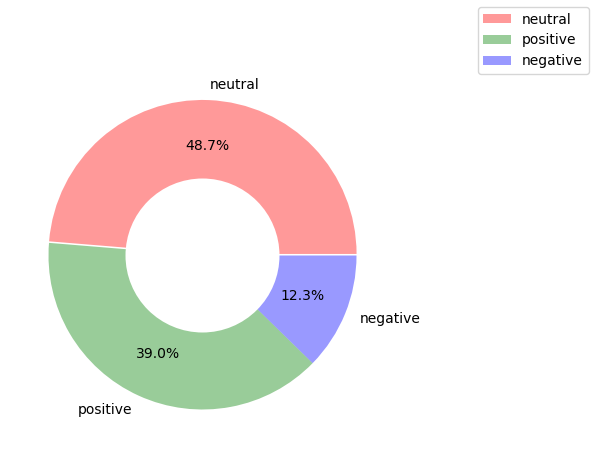

In [49]:
# import library for plotting
figure, plot = plt.subplots(figsize = (8, 5))

plot = plt.pie(
    x = sentiment_groupby_count["Sentiment_count"],
    labels = sentiment_groupby_count["Sentiment"],
    autopct = "%1.1f%%",
    explode = [0.01, 0, 0],
    colors = ["red", "green", "blue"],
    labeldistance = 1.1,
    pctdistance = 0.7,
    wedgeprops = {"alpha": 0.40},
    textprops = {"color": "black"},
)

# to draw a white circle in the middle
center_circle = plt.Circle((0, 0), radius = 0.5, fc="white")
figure = plt.gcf()
figure.gca().add_artist(center_circle)
figure.legend(sentiment_groupby_count["Sentiment"], loc = "upper right")

plt.show()

#### comment
----
from the plot results, I can see that `almost half of the tweets are netural` (~49%) and that is the `highest amongst all sentiments`, followed by `positive tweets rougly 40%` compared to a very low `negative tweets roughly 10%`.

### task16
---
a. `10` most common words for each sentiment

b. use a plot to show the result above


for 10 most common words - doing TF-IDF analysis??
~~the higher TF-IDF number, more significant the word is; 
should we look for 10 less significant words? Lower TF-IDF?~~

- Just counting the word frequency instead of doing whole TF-IDF
- Actually I did TF-IDF analysis, but doesn't make sense when I have to find just most common words. 
- In the contrary, if I had to find most significant words of a particular document then it would make more sense that I did TF-IDF. (I deleted that part)


- this make sense for most common words reference: https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d

In [50]:
from wordcloud import WordCloud, STOPWORDS
# create a list of unique stop words (aka set)
stopwords = set(STOPWORDS)

- since some words appeared on the wordcloud in the sentiment doesnt make sense
- update the list of stopwords to do a meaningful analysis
- `amp` was one of the words (&amp; after removing some symbols, doesn't mean much for the analysis)
- using several trials to update the list of stopwords to make sense
- `tesla`, `starlink`, `spacex` (since Elon must bought twitter, it could easily be overused - lose significance)
- some words (e.g. much) appears on both word clouds positive and negative - could be used in wrong context
- some words (e.g. yes, yeah, yup) appears in neutral word cloud but are indeed positive words; could be wrong context
---
updates: doing this manually was so time consuming, I came up with different idea
- update the stopwords until all 3 clouds for most popular words have distinct words
- meaning - intersection of all 3 clouds for most popular words is empty
- if a common word is found, update stopwords list
- how does that sound??

In [51]:
stopwords.update([
    "amp", "tesla", "twitter", "starlink", "spacex", "ye", "yes", "yeah",  "yup", "big"
])
# print(f"stopwords length: {len(stopwords)}")

- create a dictionary of all words mapped to the number of times they appeared in the corpus to count `word freqency`

- sorting that dictionary in the reverse order based on the `word count` and choosing first 10 words give the most common word

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
count = CountVectorizer()

In [53]:
# bookkeeping variable
common_count = -1

# because we have to do for each sentiment, we will have to pass the list of the tweets of that sentiment
def get_n_most_popular_words(sentiment:str, exclude_words = stopwords, n = 10):
    # get the list of tweets for the given sentiment
    tweet_list = sentiment_grouped.get_group(sentiment)["tweet_cleaned"]
    word_count = count.fit_transform(tweet_list)
    common_count = word_count.shape[1]
    sum_words = word_count.sum(axis=0)

    # create a list of tuple of all words: (words, frequency)
    # and return the top 10 words
    words_frequency = sorted(
        ((word, sum_words[0, index]) for word, index in count.vocabulary_.items() if word not in exclude_words),
        key = lambda x: -x[1]
    )

    return {k:v for k, v in words_frequency[:10]}

In [54]:
def get_10_popular_by_sentiment(sentiment:str, common_count = -1):
    while common_count:
        most_common_positive_words = get_n_most_popular_words("positive")
        most_common_negative_words = get_n_most_popular_words("negative")
        most_common_neutral_words = get_n_most_popular_words("neutral")

        positive_negative = set(most_common_positive_words).intersection(most_common_negative_words)
        positive_neutral = set(most_common_positive_words).intersection(most_common_neutral_words)
        negative_neutral =  set(most_common_negative_words).intersection(most_common_neutral_words)
        common_count = len(positive_negative) + len(positive_neutral) + len(negative_neutral)

        if common_count:
            stopwords.update(list(positive_negative))
            stopwords.update(list(positive_neutral))
            stopwords.update(list(negative_neutral))
        else:
            break
    
    if sentiment == "positive":
        return most_common_positive_words.keys()
    elif sentiment == "negative":
        return most_common_negative_words.keys()
    else:
        return most_common_neutral_words.keys()

print(f"popular positive words: {get_10_popular_by_sentiment('positive')}")
print(f"popular negative words: {get_10_popular_by_sentiment('negative')}")
print(f"popular neutral words: {get_10_popular_by_sentiment('neutral')}")

popular positive words: dict_keys(['good', 'true', 'great', 'many', 'exactly', 'high', 'haha', 'far', 'first', 'right'])
popular negative words: dict_keys(['hard', 'bad', 'mean', 'long', 'way', 'game', 'little', 'earth', 'still', 'less'])
popular neutral words: dict_keys(['maybe', 'next', 'think', 'probably', 'go', 'day', 'use', 'well', 'lot', 'orbit'])


generate word cloud - for each sentiment
- using a nested function to make sure that proper word cloud is generated by passing a sentiment to the function `generate_wordcloud`
- nested functions reference: https://www.freecodecamp.org/news/nested-functions-in-python/

In [55]:
def generate_wordcloud(sentiment: str, exclude_words = stopwords):
    
    figure, plots = plt.subplots(ncols=2, figsize=(20, 8))

    # traditional way: fetch all words from cleaned tweets with given sentiment
    def get_words_by_sentiment(sentiment: str):
        return " ".join(sentiment_grouped.get_group(sentiment)["tweet_cleaned"])
    
    text = get_words_by_sentiment(sentiment)
    word_cloud0 = WordCloud(stopwords = exclude_words).generate(text)
    
    plots[0].imshow(word_cloud0, interpolation="bilinear")
    plots[0].axis("off")
    plots[0].set_title(f"Popular words from {sentiment} tweets")

    # most popular only
    word_cloud1 = WordCloud(stopwords = exclude_words).generate(
        " ".join(get_10_popular_by_sentiment(sentiment))
    )
    plots[1].imshow(word_cloud1, interpolation="bilinear")
    plots[1].axis("off")
    plots[1].set_title(f"The most common 10 words from {sentiment} tweets")

    plt.show()

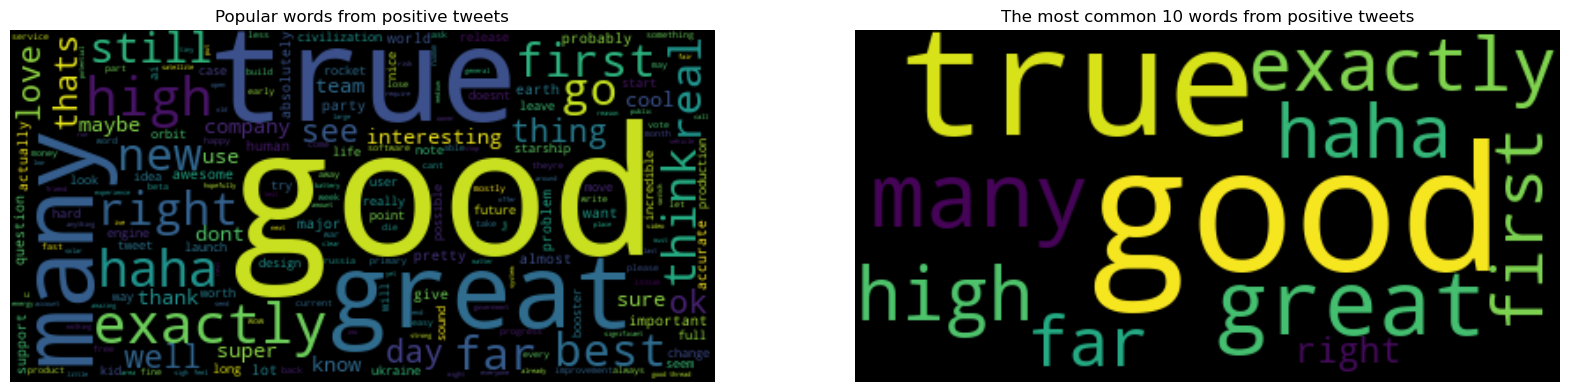

In [56]:
generate_wordcloud("positive")

From the word cloude I conclude that most popular words for popsitive sentiments are:
1. good
2. true
3. great
4. many
5. exactly
6. haha
7. right
8. new
9. best
10. love

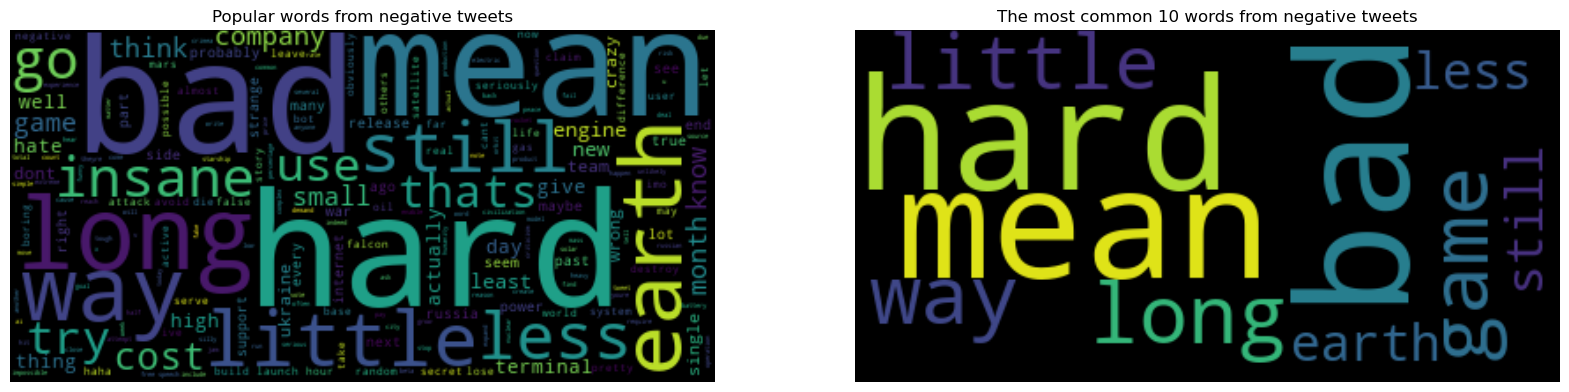

In [57]:
generate_wordcloud("negative")

From the word cloude I conclude that most popular words for negative sentiments are:
1. bad
2. hard
3. mean
4. little
5. long
6. less
7. try
8. insane
9. use
10. way


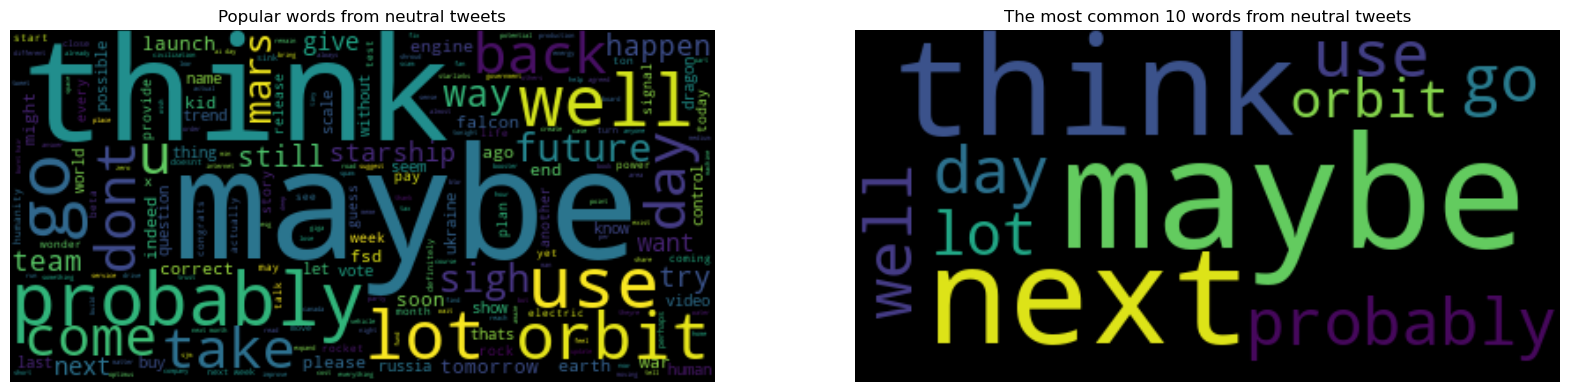

In [58]:
generate_wordcloud("neutral")

From the word cloude I conclude that most popular words for neutral sentiments are:
1. think
2. maybe
3. probably
4. orbit
5. go
6. well
7. day
8. back
9. take
10. come

#### comments
---
The most common 10 words by `analytical method` and most popular words using the `wordcloud` are almost similar even though method varies slighly to generate both

### task17:
---
plot to show the number of likes and retweets per sentiment, comment

In [59]:
retweets_likes_by_sentiment = sentiment_grouped.sum(numeric_only=True)\
                                .drop("Polarity", axis=1)\
                                .sort_values(by=["Likes", "Retweets"], ascending=False)\
                                .reset_index()

mean_retweets_likes_by_sentiment = sentiment_grouped\
                                    .mean(numeric_only=True)\
                                    .drop(columns = "Polarity", axis = 1)\
                                    .sort_values(by=["Likes", "Retweets"], ascending=False)\
                                    .reset_index()

retweets_likes_by_sentiment["likes_per_retweet"] = retweets_likes_by_sentiment["Likes"] / retweets_likes_by_sentiment["Retweets"]
mean_retweets_likes_by_sentiment["likes_per_retweet"] = mean_retweets_likes_by_sentiment["Likes"] / mean_retweets_likes_by_sentiment["Retweets"]
display(retweets_likes_by_sentiment)
display(mean_retweets_likes_by_sentiment)

,Sentiment,Retweets,Likes,likes_per_retweet
0,neutral,9181374,109708755,11.949056
1,positive,6288539,79253335,12.602822
2,negative,2423289,27518767,11.355958


,Sentiment,Retweets,Likes,likes_per_retweet
0,neutral,6161.995973,73630.036913,11.949056
1,negative,6427.822281,72994.076923,11.355958
2,positive,5271.197821,66431.965633,12.602822


function to create bar-chart for retweets and likes

In [60]:
def draw_barchart(ax, data, row: int , col: int, criteria: str, is_avg=False):
    # plot for likes
    sns.barplot(
        data = data,
        x = data["Sentiment"],
        y = data[criteria],
        ax = ax[row][col],
        palette = ["red", "green", "blue"],
        alpha = 0.5,
    )

    # set axis - ticks: 
    # reference: https://stackoverflow.com/questions/53747298/how-to-format-seaborn-matplotlib-axis-tick-labels-from-number-to-thousands-or-mi
    plots[row][col].yaxis.set_major_formatter(ticker.EngFormatter())
    plots[row][col].set_title(f"{criteria} per sentiment")
    # put labels on bar when plotting average number of Retweets | Likes
    if is_avg: 
        plots[row][col].bar_label(plots[row][col].containers[0],)

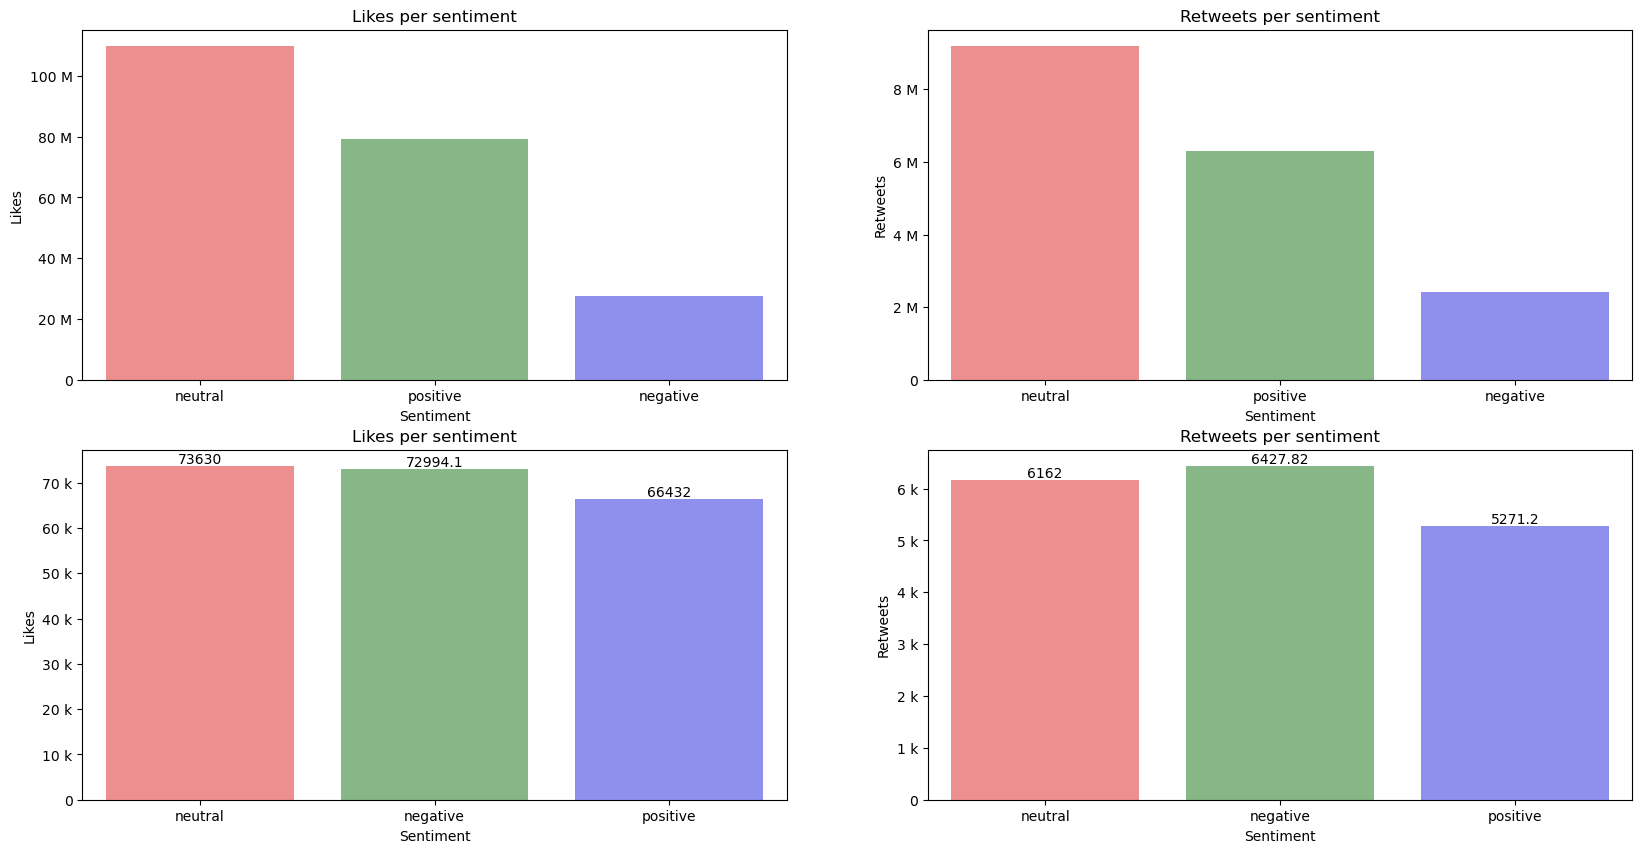

In [61]:
figure, plots = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

# for number of likes
draw_barchart(plots, retweets_likes_by_sentiment, 0, 0, "Likes")

# for number of retweets
draw_barchart(plots, retweets_likes_by_sentiment, 0, 1, "Retweets")

# for average number of likes
draw_barchart(plots, mean_retweets_likes_by_sentiment, 1, 0, "Likes", is_avg=True)

# for average number of likes
draw_barchart(plots, mean_retweets_likes_by_sentiment, 1, 1, "Retweets", is_avg=True)

#### comments
----
- From the graph above I confirm that, both `number of retweets` and `number of likes` are **highest for the neutral sentiment** amongst all the sentiments.
- I can say that **number of likes are roughly `10` times more than number of retweets**
- The `average number of retweets` for `negative sentiments` is higher compared to `positive sentiment`, but only slighly higher compared to `neutral sentiment` 
- however `average of likes` is highest for `neutral sentiment` that is slighltly higher to `negative sentiment`.
- For `positive sentiment` the `average engagement` (likes and retweets) is the lowest compared to `negative and neutral sentiment`.

### Alternate way
---
showing with plotly because that is interactive - you can click the legend to toggle retweets/likes (and ticks on the axis will change automatically)

In [62]:
# showing using bar-chart
figure0 = go.Figure()

figure0.add_trace(go.Bar(
    x = retweets_likes_by_sentiment["Sentiment"],
    y = retweets_likes_by_sentiment["Retweets"],
    name = "Retweets",
    marker = dict(color = "blue", opacity = 0.5),
))

figure0.add_trace(go.Bar(
    x = retweets_likes_by_sentiment["Sentiment"],
    y = retweets_likes_by_sentiment["Likes"],
    name = "Likes",
    marker = dict(color = "red", opacity = 0.5),
))

# Change the bar mode
figure0.update_xaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)
figure0.update_yaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)
figure0.update_layout({"plot_bgcolor": "white", "paper_bgcolor":"white", "barmode": "group"})
figure0.show()

In [63]:
figure1 = go.Figure()

figure1.add_trace(go.Bar(
    x = mean_retweets_likes_by_sentiment["Sentiment"],
    y = mean_retweets_likes_by_sentiment["Retweets"],
    name = "Average Retweets",
    marker = dict(color = "blue", opacity = 0.5),
))


figure1.add_trace(go.Bar(
    x = mean_retweets_likes_by_sentiment["Sentiment"],
    y = mean_retweets_likes_by_sentiment["Likes"],
    name = "Average Likes",
    marker = dict(color = "red", opacity = 0.5),
))


figure1.update_xaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)
figure1.update_yaxes(showline = True, linewidth = 2, linecolor = "black", mirror = True)
figure1.update_layout({"plot_bgcolor": "white", "paper_bgcolor":"white"})
figure1.show()